**1-Importation des bibliothèques**

In [3]:
!pip install datasets scikit-fuzzy
!pip install twitter tweepy nltk scikit-learn ipython

import re
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
import skfuzzy as fuzz

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

**2-Chargement et Prétraitement des Tweets**

In [4]:
def load_and_preprocess_dataset():
    dataset = load_dataset("cardiffnlp/tweet_eval", "emoji")
    tweets = [example['text'] for example in dataset['train'].select(range(1000))]
    return tweets

def preprocess_tweet(tweet):
    tweet = re.sub(r'http\S+', '', tweet)
    tweet = re.sub(r'@\w+', '', tweet)
    tweet = re.sub(r'#', '', tweet)
    tweet = re.sub(r'\W', ' ', tweet)
    tweet = tweet.lower()
    return tweet

def process_tweet(tweet):
    tokens = word_tokenize(tweet)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

def preprocess_and_process_tweets(tweets):
    preprocessed = [preprocess_tweet(tweet) for tweet in tweets]
    processed = [process_tweet(tweet) for tweet in preprocessed]
    return processed

**3-Vectorisation et Réduction de Dimension**

In [5]:
def vectorize_and_reduce(tweets):
    vectorizer = TfidfVectorizer(max_features=5000, max_df=0.8, min_df=5)
    X = vectorizer.fit_transform(tweets).toarray()
    svd = TruncatedSVD(n_components=50, random_state=0)
    X_reduced = svd.fit_transform(X)
    return X_reduced

**4-Clustering avec K-Means**

In [6]:
def cluster_tweets_kmeans(X, k):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10).fit(X)
    return kmeans.labels_

def execute_clustering_kmeans(X, k_range):
    k_results = {}
    for k in k_range:
        labels = cluster_tweets_kmeans(X, k)
        k_results[k] = labels
        print(f"K-Means terminé pour k = {k}")
    return k_results

**5-Clustering avec Fuzzy C-Means**

In [7]:
def cluster_tweets_fuzzy_cmeans(X, k):
    cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(X.T, c=k, m=2, error=0.005, maxiter=1000)
    labels = np.argmax(u, axis=0)
    return labels

def execute_clustering_fuzzy_cmeans(X, k_range):
    fuzzy_results = {}
    for k in k_range:
        labels = cluster_tweets_fuzzy_cmeans(X, k)
        fuzzy_results[k] = labels
        print(f"Fuzzy C-Means terminé pour k = {k}")
    return fuzzy_results

**5-Distance de Jaccard**

In [8]:
def jaccard_distance(tweet1, tweet2):
    set1, set2 = set(tweet1.split()), set(tweet2.split())
    return 1 - len(set1 & set2) / len(set1 | set2)

**7-Sélection des Tweets Représentatifs**

In [9]:
def select_representative_tweets(tweets, labels):
    representative_tweets = []
    for label in set(labels):
        class_tweets = [tweets[i] for i in range(len(tweets)) if labels[i] == label]
        centroid = min(class_tweets, key=lambda tweet: sum(jaccard_distance(tweet, other) for other in class_tweets))
        representative_tweets.append(centroid)
    return representative_tweets

**8-Visualisation des Clusters**

In [10]:
def plot_clusters(X, labels, title):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
    plt.colorbar()
    plt.title(title)
    plt.show()

**9-Pipeline Principal et Visualisation**

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/2.61M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/3.05M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/282k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/45000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5000 [00:00<?, ? examples/s]

K-Means terminé pour k = 2
K-Means terminé pour k = 3
K-Means terminé pour k = 4
K-Means terminé pour k = 5
K-Means terminé pour k = 6
K-Means terminé pour k = 7
K-Means terminé pour k = 8
K-Means terminé pour k = 9
K-Means terminé pour k = 10
K-Means terminé pour k = 11
K-Means terminé pour k = 12
K-Means terminé pour k = 13
K-Means terminé pour k = 14
K-Means terminé pour k = 15
K-Means terminé pour k = 16
K-Means terminé pour k = 17
K-Means terminé pour k = 18
K-Means terminé pour k = 19
K-Means terminé pour k = 20
K-Means terminé pour k = 21
K-Means terminé pour k = 22
K-Means terminé pour k = 23
K-Means terminé pour k = 24
K-Means terminé pour k = 25
K-Means terminé pour k = 26
K-Means terminé pour k = 27
K-Means terminé pour k = 28
K-Means terminé pour k = 29
K-Means terminé pour k = 30
Fuzzy C-Means terminé pour k = 2
Fuzzy C-Means terminé pour k = 3
Fuzzy C-Means terminé pour k = 4
Fuzzy C-Means terminé pour k = 5
Fuzzy C-Means terminé pour k = 6
Fuzzy C-Means terminé pour k = 

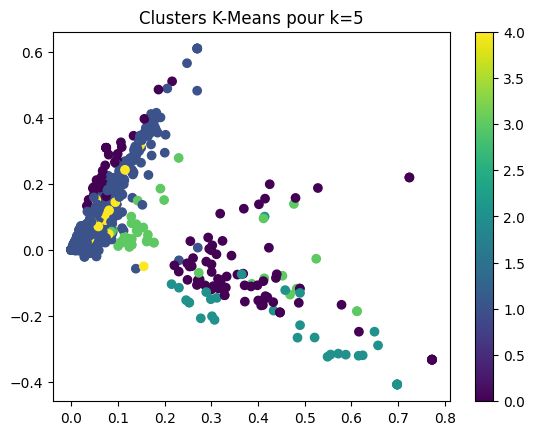

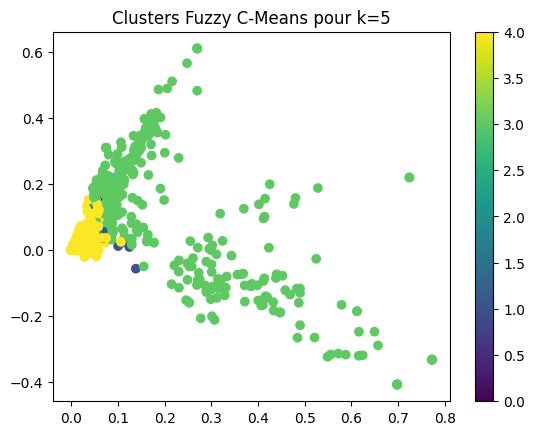

Tweets représentatifs (K-Means) :  ['@ Pismo Beach, California', 'Nine in the afternoon ️ @user @ Irvine Meadows Amphitheatre', '️ ️ ️ @ Los Angeles, California', '#sandiego @ San Diego, California', 'Christmas is my favorite time of year. #lovethesetwotodeath…']
Tweets représentatifs (Fuzzy C-Means) :  ["Life's a climb so thought I'd pick up a new hobby ️ #toprope #climb #girlsdayout…", 'Sunday afternoon walking through Venice in the sun with @user ️ ️ ️ @ Abbot Kinney, Venice', 'Missed my best friend @ Spokane, Washington', '️ ️ ️ @ Los Angeles, California', 'Repost @user @ Hollywood']


In [11]:
!pip install nltk
import nltk
nltk.download('punkt_tab')
def main_pipeline():
    tweets = load_and_preprocess_dataset()
    processed_tweets = preprocess_and_process_tweets(tweets)

    X = vectorize_and_reduce(processed_tweets)


    k_range = range(2, 31)
    kmeans_results = execute_clustering_kmeans(X, k_range)
    fuzzy_results = execute_clustering_fuzzy_cmeans(X, k_range)

    kmeans_labels = kmeans_results[5]
    fuzzy_labels = fuzzy_results[5]
    representative_kmeans = select_representative_tweets(tweets, kmeans_labels)
    representative_fuzzy = select_representative_tweets(tweets, fuzzy_labels)

    plot_clusters(X, kmeans_labels, "Clusters K-Means pour k=5")
    plot_clusters(X, fuzzy_labels, "Clusters Fuzzy C-Means pour k=5")

    print("Tweets représentatifs (K-Means) : ", representative_kmeans)
    print("Tweets représentatifs (Fuzzy C-Means) : ", representative_fuzzy)

main_pipeline()

**Téléchargement de Fichier requirements.txt**

In [12]:
!pip freeze > requirements.txt